In [10]:
import pandas as pd 
import numpy as np  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# read train data
data_train = pd.read_csv("../dataset/CIC-2018/balanced_sql.csv")
# Create matrix of features and matrix of target variable 
dataset = data_train.values
X = dataset[:,0:79]
y = dataset[:,79]

# convert the scaled array to dataframe 
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train = X_scale
y_train = y

# read test data
data_test = pd.read_csv("../dataset/CIC-2018/testsql.csv") 
dataset1 = data_test.values
X1 = dataset1[:,0:79]
y1 = dataset1[:,79]

# convert the scaled array to dataframe 
scaler = MinMaxScaler()
X_scale_test = scaler.fit_transform(X1)

X_test = X_scale_test
y_test = y1

print(data_train['Label'].value_counts())
print(data_test['Label'].value_counts())

0.0    14001
1.0    14001
Name: Label, dtype: int64
0    5999
1      17
Name: Label, dtype: int64


In [11]:
# define the keras model
model = Sequential()
model.add(Dense(128, input_shape=(79,), activation='relu'))
model.add(Dense(79, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10, batch_size=100)
 
# make class predictions with the model
y_pred = predictions = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

%matplotlib inline
# Testing 
cm = confusion_matrix(y_test, y_pred) 
tnr = recall_score(y_test, y_pred) 
fpr = 1 - tnr

print ("confusion_matrix for test data\n",cm)
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))
print('FPR Score: %.4f' % fpr)

Epoch 1/10
29/29 [==============================] - 1s 6ms/step - loss: 0.3863 - accuracy: 0.9242
Epoch 2/10
29/29 [==============================] - 0s 8ms/step - loss: 0.1037 - accuracy: 0.9993
Epoch 3/10
29/29 [==============================] - 0s 8ms/step - loss: 0.0302 - accuracy: 0.9993
Epoch 4/10
29/29 [==============================] - 0s 8ms/step - loss: 0.0137 - accuracy: 0.9993
Epoch 5/10
29/29 [==============================] - 0s 8ms/step - loss: 0.0089 - accuracy: 0.9993
Epoch 6/10
29/29 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 0.9993
Epoch 7/10
29/29 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.9993
Epoch 8/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 0.9993
Epoch 9/10
29/29 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 10/10
188/188 [==============================] - 1s 3ms/step
Accuracy: 99.58%
confusion_matrix for test data
 [

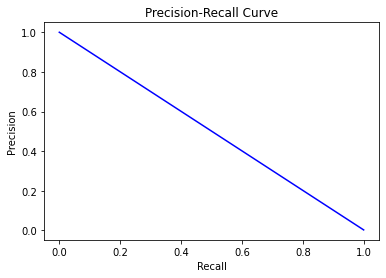

In [6]:
#Plot Precision-Recall Curve 
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')
ax.grid(False)

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
#plt.savefig('Precision-Recall_curve_DNN_CIC_after.png')
plt.show()

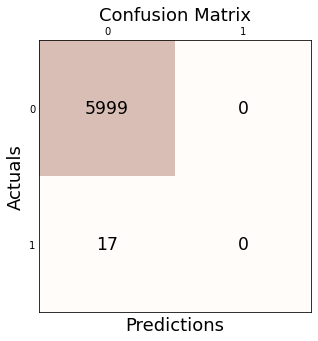

In [8]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap='Oranges', alpha=0.3)
ax.grid(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('confusion_matrix_DNN_CIC_sql_before.png')
plt.show()

roc_auc_score:  0.5


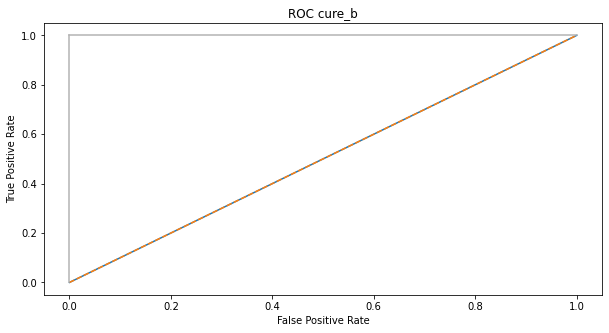

In [9]:
# Plot ROC
from sklearn.metrics import auc, plot_precision_recall_curve, roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
plt.subplots(1, figsize=(10,5))
plt.title('ROC cure_b')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Roc_curve_DNN_CIC_sql_before.png')
plt.show()